## اضاف کردن کتابخانه‌های مورد نیاز

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## خواندن داده
پس از خواندن داده برای بدست آورن مقادیر ستون‌های خواسته شده، ردیف‌هایی که خالی هستند و داده‌ای در آنها وجود ندارد را حذف می‌کنیم

In [23]:
df = pd.read_csv('titanic.csv')
ages = df.Age[ ~df.Age.isna() ].values
survived = df['Survived'][ ~df.Age.isna() ].values
sex = df['Sex'][ ~df.Age.isna() ].values

### جنسیت بازمانده‌ها

In [24]:
# df.groupby(['Sex','Survived']).PassengerId.count()
df.groupby(['Sex','Survived']).agg({'PassengerId':'count'})

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

### توزیع سنی مسافران

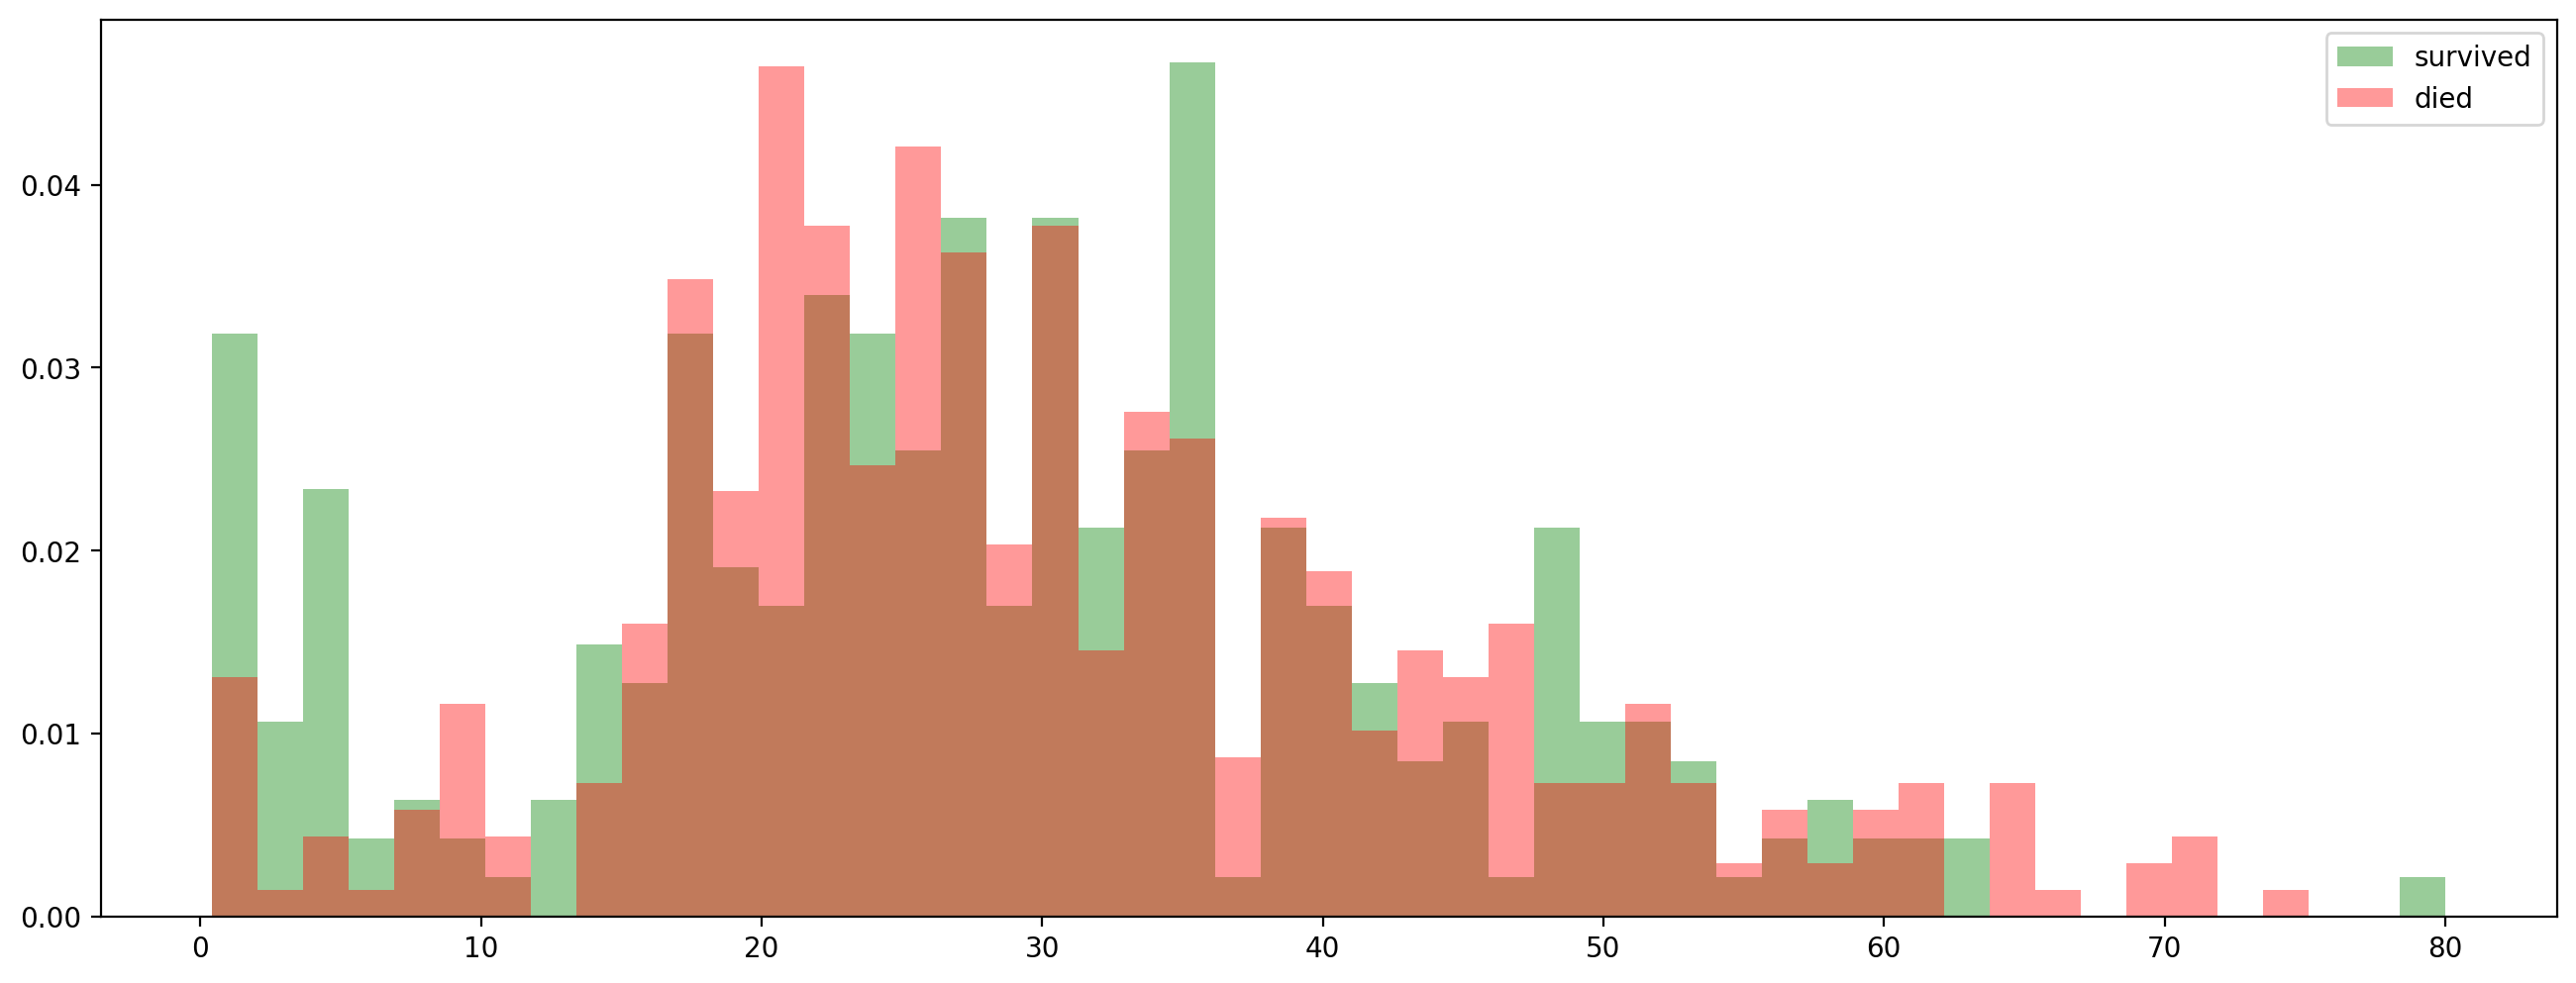

In [25]:
v_min, v_max = min( ages ), max(ages)
bins = np.linspace( v_min, v_max, 50 )

plt.figure( figsize=(16,6), dpi = 200 )

# Survived
indices = survived == 1
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived' )
# Died
indices = survived == 0
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died' )

plt.legend()
plt.show()

### دسته‌بندی سنی دلخواه

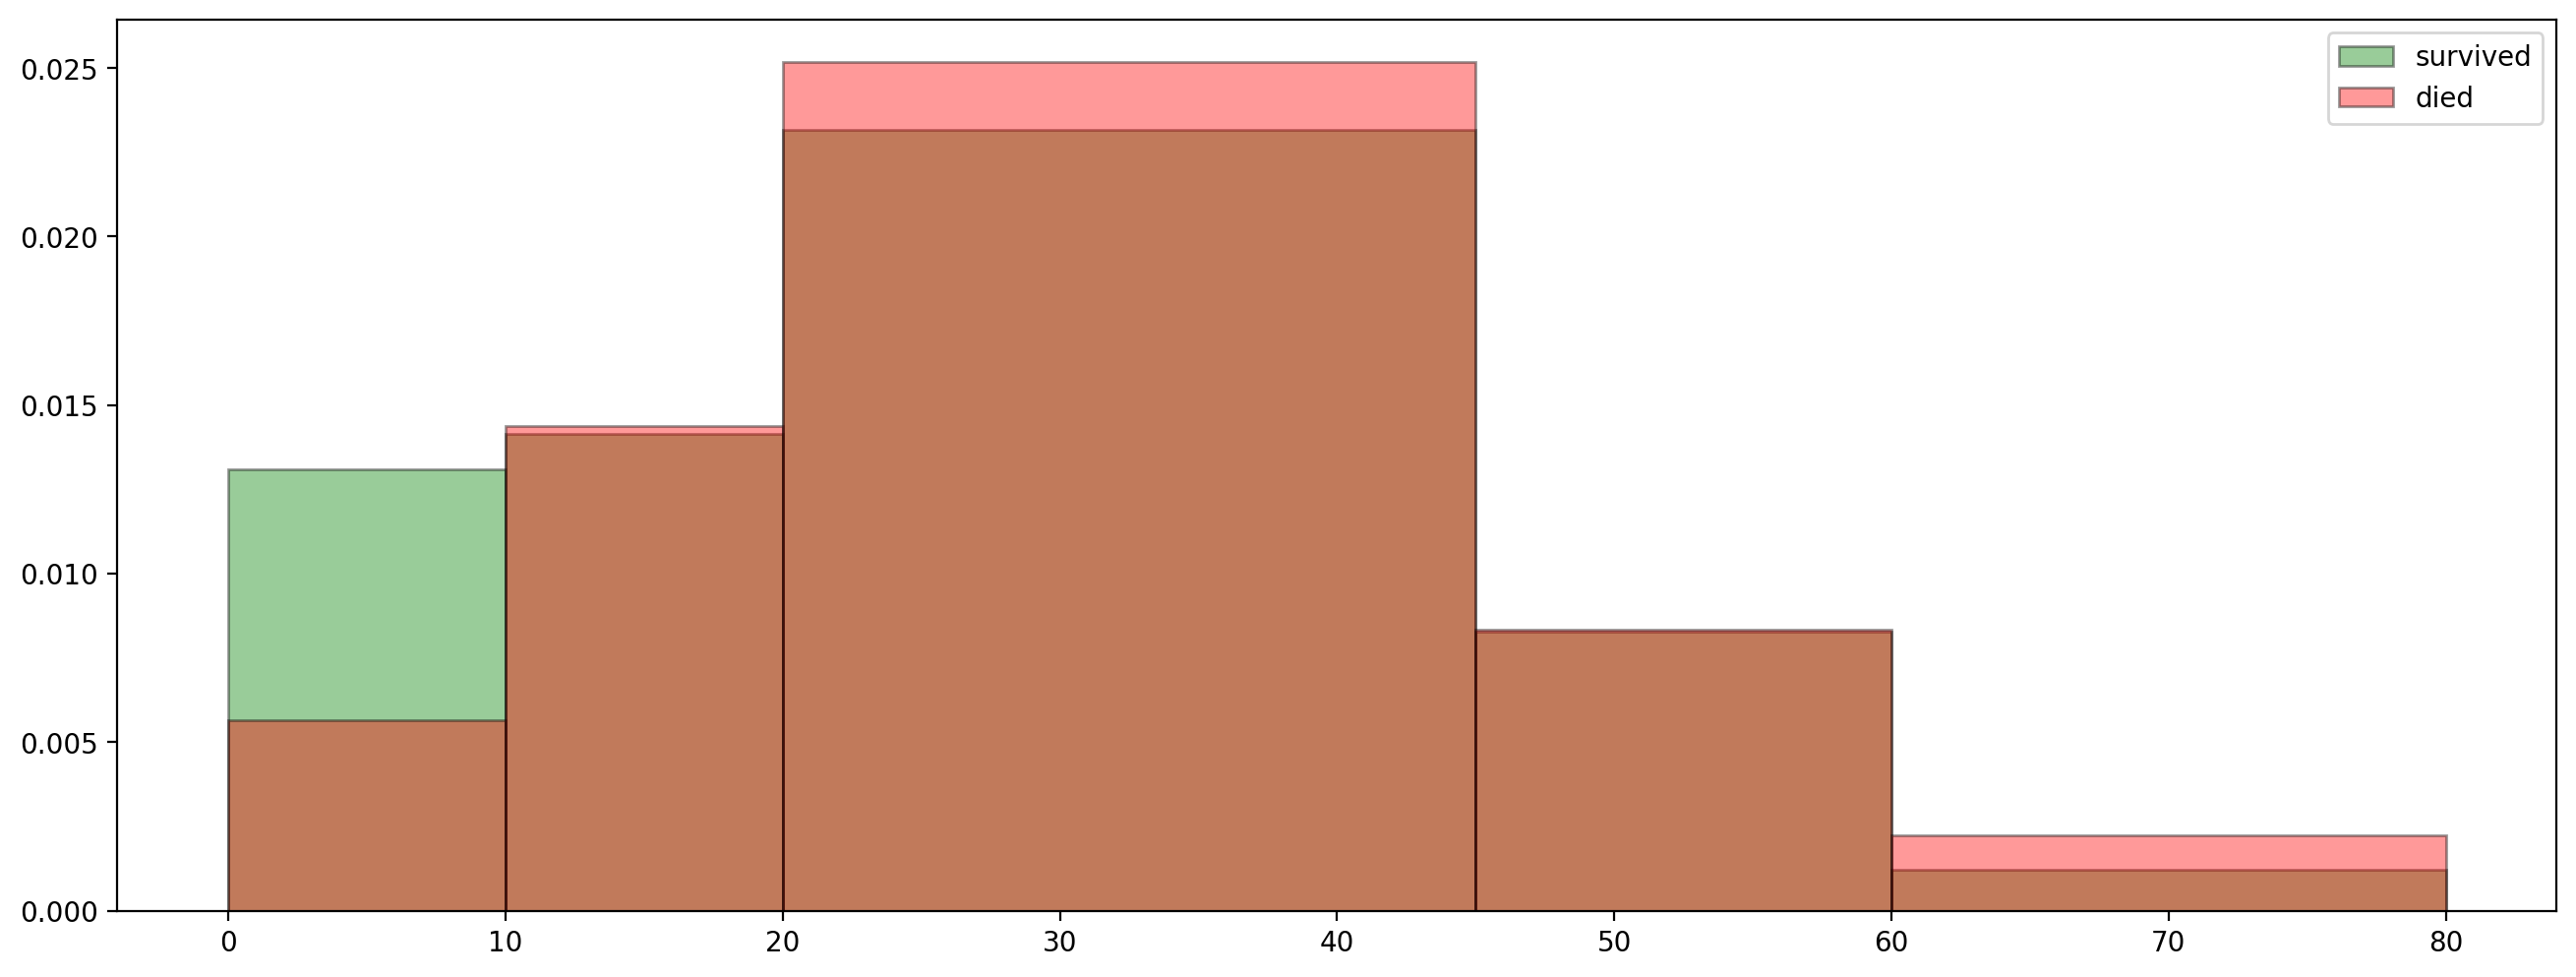

In [26]:
v_min, v_max = min( ages ), max(ages)
bins = np.array([ 0, 10, 20, 45, 60, 80 ])



plt.figure( figsize=(16,6), dpi = 200 )
## Survived
indices = survived == 1
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived', ec = 'black' )
## Died
indices = survived == 0
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died', ec = 'black' )
#
plt.legend()
plt.show()

### دسته‌بندی دلخواه به تفکیک جنسیت

In [27]:
v_min, v_max = min( ages ), max(ages)
bins = np.array([ 0, 10, 20, 45, 60, 80 ])

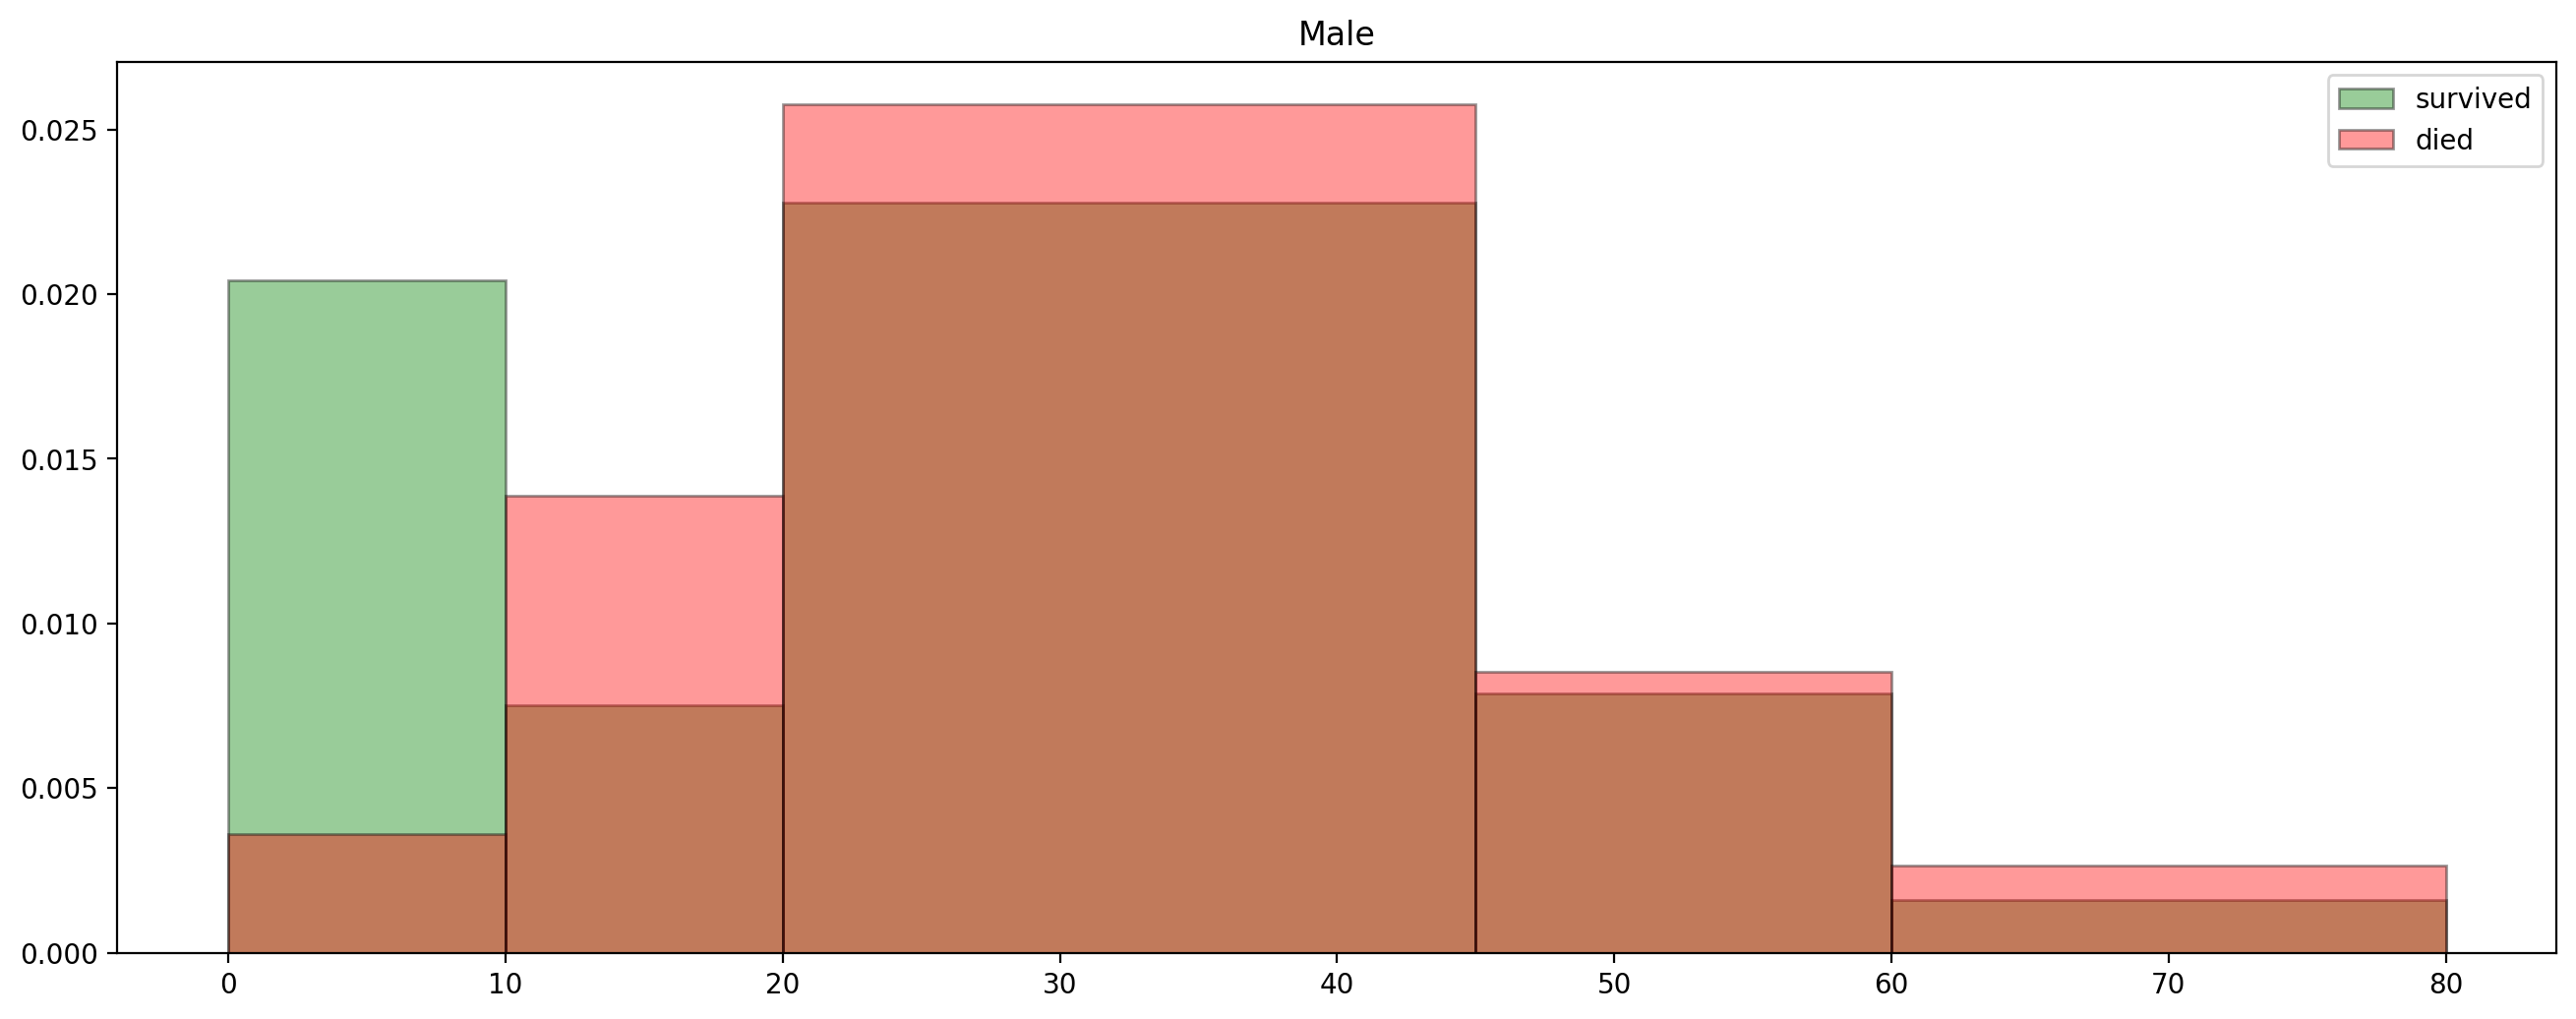

In [28]:
# Man vs. Woman
############## Man
plt.figure( figsize=(16,6), dpi = 200 )
plt.title('Male')
## Survived
indices = (survived == 1) & (sex == 'male')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived', ec = 'black' )
## Died
indices = (survived == 0) & (sex == 'male')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died', ec = 'black' )
#
plt.legend()
plt.show()

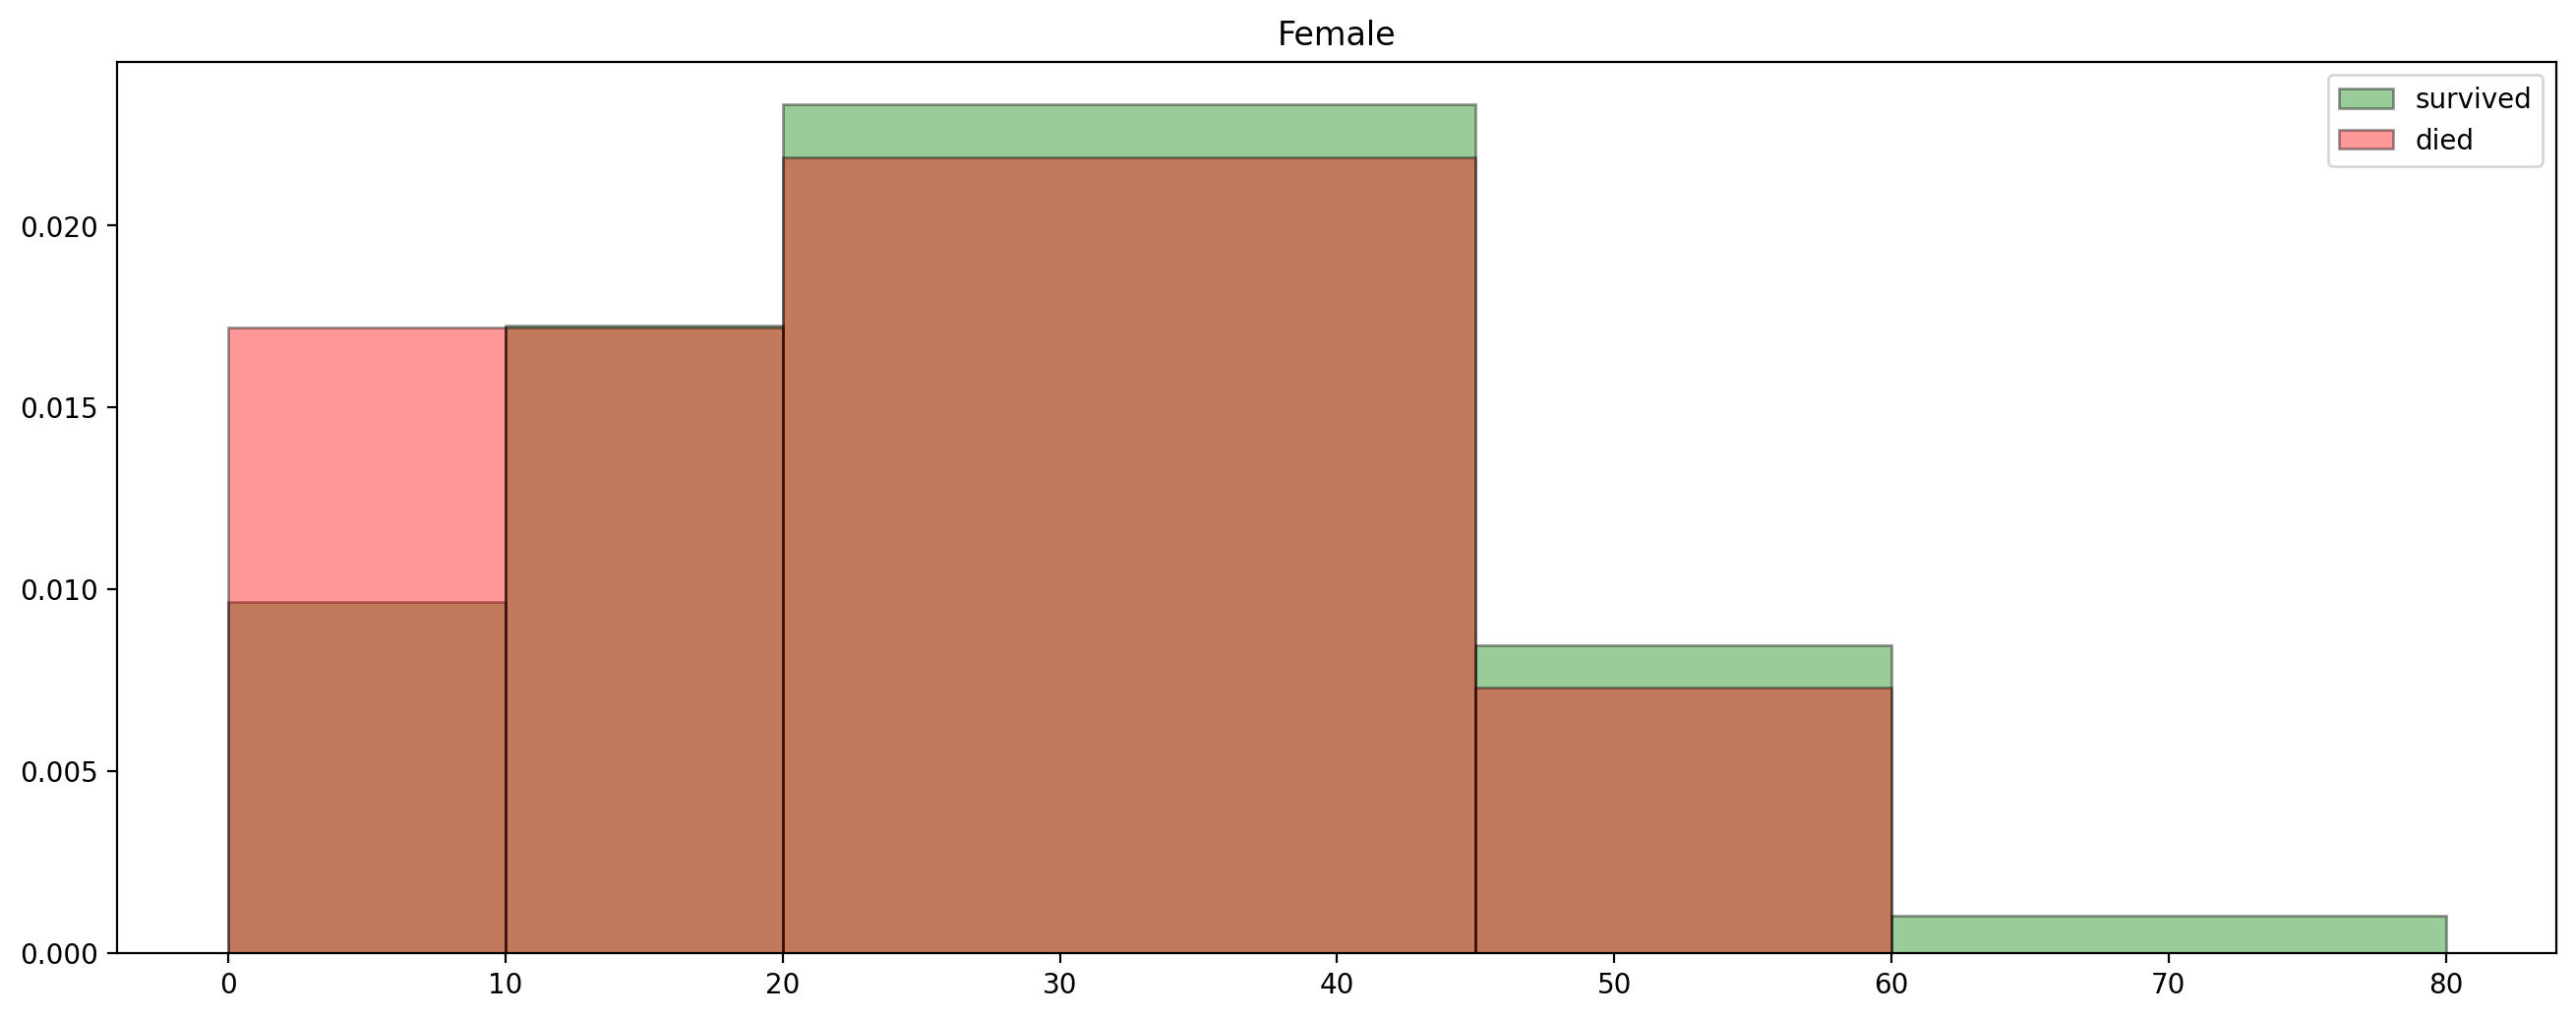

In [29]:
############## Woman
plt.figure( figsize=(16,6), dpi = 200 )
plt.title('Female')
## Survived
indices = (survived == 1) & (sex == 'female')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived', ec = 'black' )
## Died
indices = (survived == 0) & (sex == 'female')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died', ec = 'black' )
#
plt.legend()
plt.show()

### شانس زنده ماندن در هر کلاس سنی

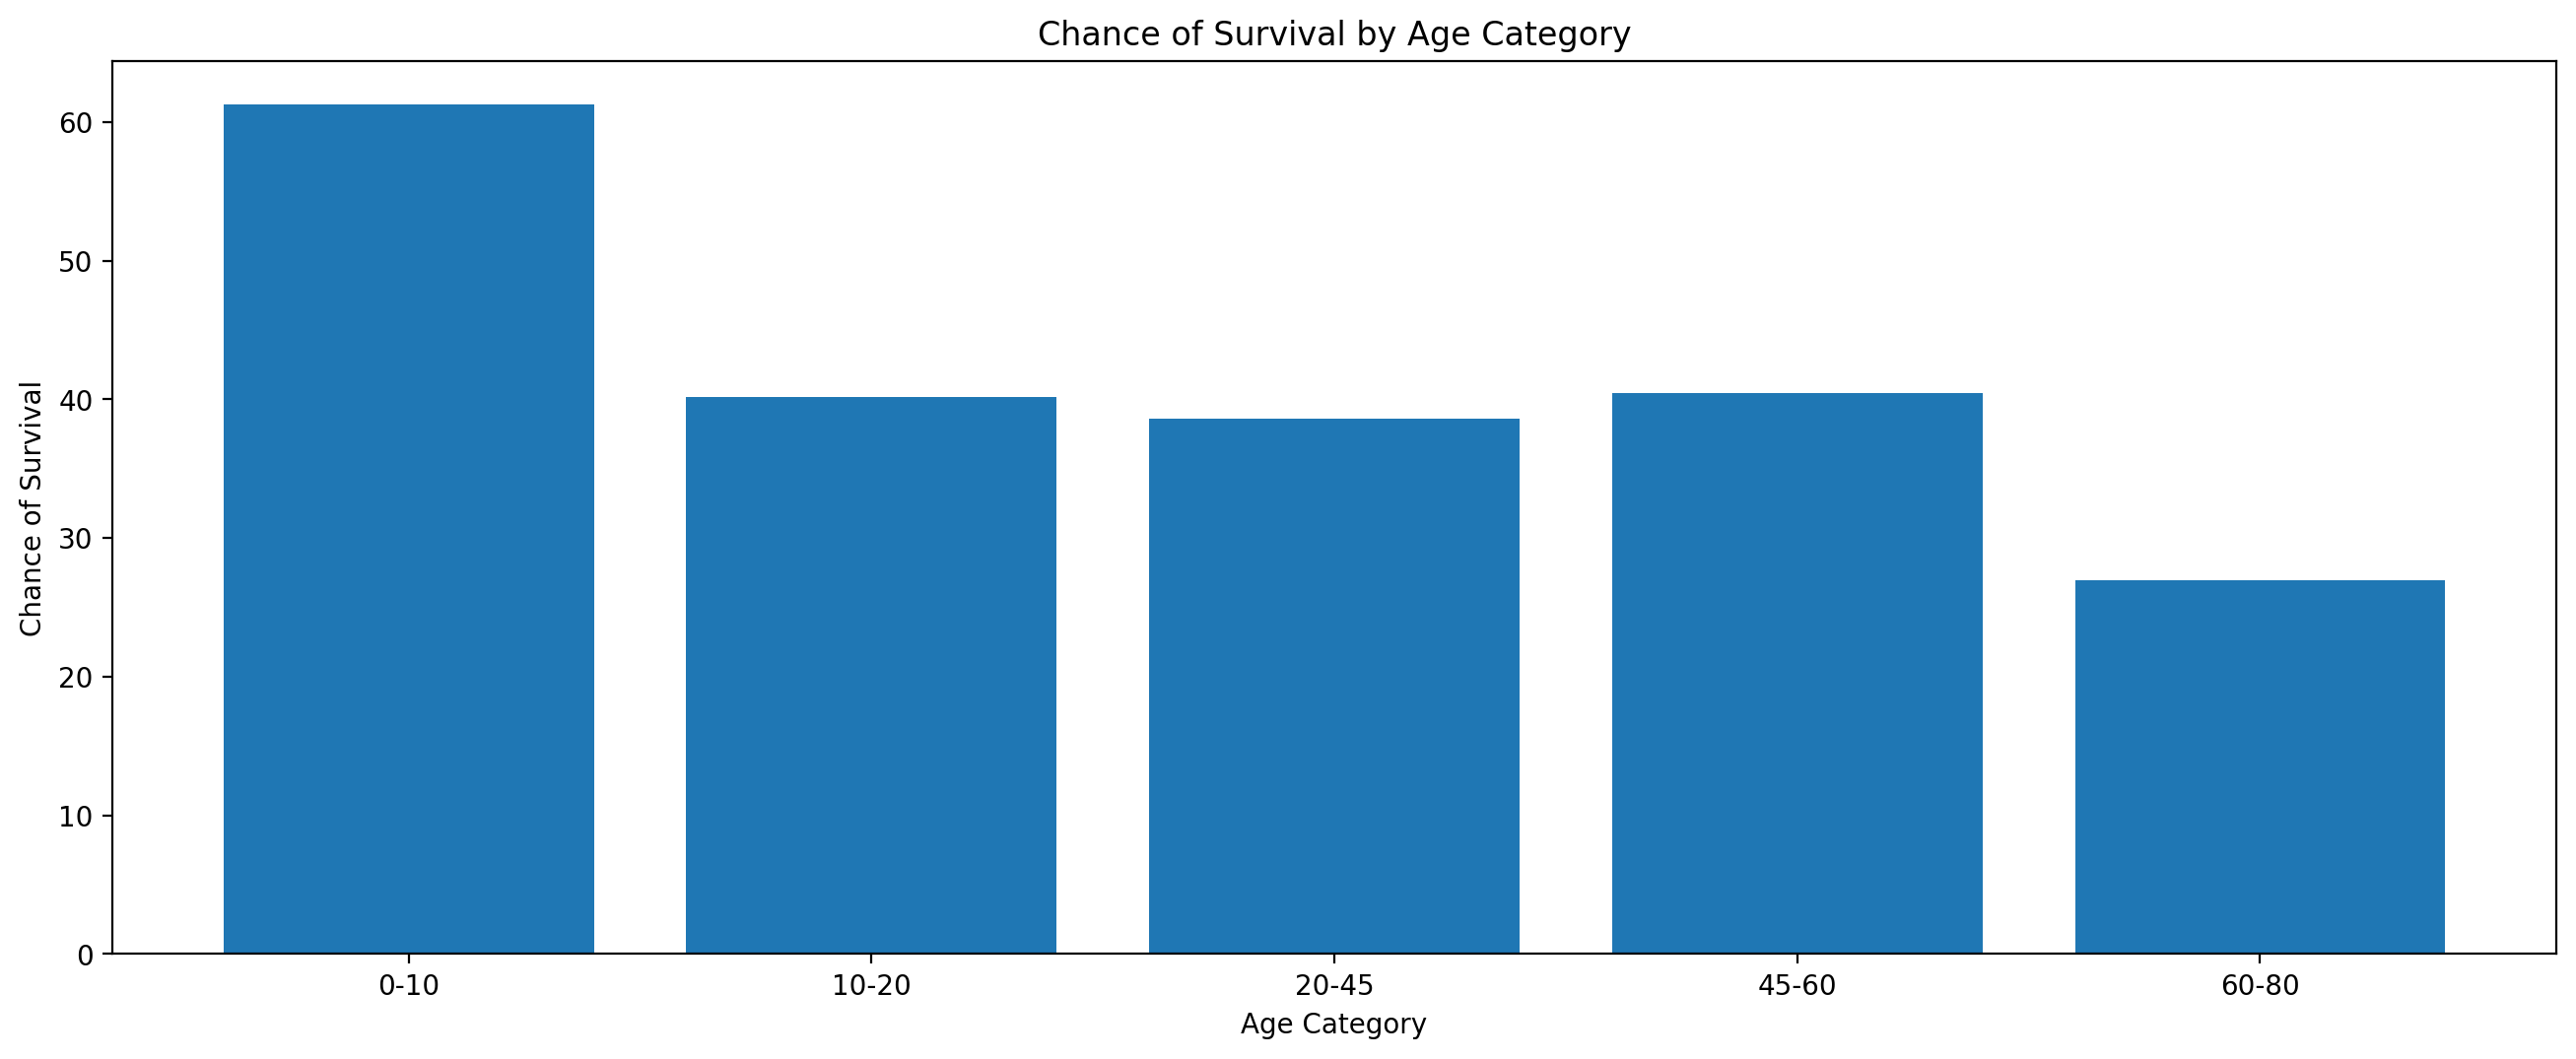

In [30]:
v_min, v_max = min( ages ), max(ages)
bins = np.array([ 0, 10, 20, 45, 60, 80 ])

plt.figure( figsize=(16,6), dpi = 200 )
plt.title('Chance of Survival by Age Category')
## Survived
indices = survived == 1
freqs_survived, _ = np.histogram( ages[indices], bins = bins )
## Died
indices = survived == 0
freqs_died, _ = np.histogram( ages[indices], bins = bins )
# To Plot
xs = [ '{}-{}'.format(bins[i],bins[i+1]) for i in range(len(bins)-1) ]
to_plot = 100 * freqs_survived / ( freqs_survived + freqs_died )
plt.bar( xs, to_plot )
#
plt.xlabel('Age Category')
plt.ylabel('Chance of Survival')
plt.show()

# تمرین
تابع `survival_chance` را طوری تکمیل کنید که با گرفتن داده‌ی تایتانیک و  یک بازه‌ی سنی (شامل سن ابتدا و انتهای بازه)، شانس زنده ماندن در آن بازه را به ازای جنسیت مرد و زن، به صورت یک دیکشنری گزارش کند. (تنها برای مسافرانی که عدد سن برای آن‌ها وجود دارد). سپس آن را در فایل `functions.py` قرار دهید.

$$
Age_{start} \leqslant Age \leqslant Age_{end}
$$

- در صورتی که در بازه‌ی داده شده، از یکی از (یا هردوی) جنسیت‌ها نمونه‌ای وجود نداشته‌ باشد، در خروجی برای آن جنسیت مقدار `-1` در نظر بگیرید.
- شانس زنده ماندن را تا ۳ رقم اعشار گرد کنید.
- دیکشنری خروجی به شکل زیر خواهد بود.
```python
{
    "male":chace_for_males,
    "female":chance_for_females
}
```

In [31]:
def survival_chance(titanic_df,start_age,end_age):

    all_df = titanic_df[ ~titanic_df.Age.isna() ]
    df = all_df[ (start_age <= all_df.Age) & (all_df.Age <= end_age)]
    male_df = df[ df.Sex == "male"] 
    survived_male = male_df[ male_df.Survived == 1]
    female_df = df[ df.Sex == "female"]
    survived_female = female_df[ female_df.Survived == 1]
    
    count_male = 0
    count_female = 0
    dic = {}
    if len(male_df) == 0:
        dic["male"] = -1
    else:
        dic["male"] = round( len(survived_male)/len(male_df), 3)
        
    if len(female_df) == 0:
        dic["female"] = -1
    else:
        dic["female"] = round( len(survived_female)/len(female_df), 3)
        
    return dic

برای تست کردن تابع خود می‌توانید خط زیر را اجرا کنید.

In [32]:
assert survival_chance(df,70,80) == {'female': -1, 'male': 0.143}